In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Task 1: Statistics

## Conditional Probabilities
You know the University of Bremen has 18,631 students, of which 6,671 are in natural sciences and engineering (see https://www.uni-bremen.de/en/university/profile/facts-figures ). Three-quarters of your friends in the natural sciences like mate (a beverage) from your personal experience. 
You are curious if you can determine how likely someone studies in this field, given they like mate. Therefore, you conduct a quick experiment in the mensa and ask at random tables the field and how much they like mate. 

The following matrix describes your data. The first column describes if the person studies natural sciences (or not) and the second how much they like mate (scale from -2 to 2, higher=likes better, neutral is not allowed).

In [5]:
questionaire_mate = np.array([[True, 1], [False, -1], [False, 1], [False, -1], [True, 1], [False, 1], [False, -2], [False, -1]])

questionaire_mate

array([[ 1,  1],
       [ 0, -1],
       [ 0,  1],
       [ 0, -1],
       [ 1,  1],
       [ 0,  1],
       [ 0, -2],
       [ 0, -1]])

Given a person likes mate, how likely are they to study in the natural sciences?

In [47]:
# P(A) = Probability that a person studies natural sciences
P_A = 6671/18631
print("Probability that a person studies natural sciences, P(A):", P_A)

#P (B) = Probability that a person likes mate
P_B = np.sum(questionaire_mate[:, 1] > 0) / questionaire_mate.shape[0] 
print("Probability that a person likes mate, P(B):", P_B)

# P(A|B) = Probability that a person studies natural sciences, given they like mate
# Using Bayes Theorem; P(A|B) = (P(B|A)* P(A)) /P(B)

# We have P(A) and P(B), lets find P(B|A) and substitute it in our formular
natural_science_students = questionaire_mate[questionaire_mate[:, 0] == 1]
print("Number of students who study natural sciences, num_A: ", natural_science_students.shape[0])

num_like_mate_given_study_natural_sciences = np.sum(natural_science_students[:, 1] > 0)
print("Number of students who like mate given they study natural sciences, num_B_given_A: ", num_like_mate_given_study_natural_sciences)

# Therefore, probability that person likes mate given they study natural sciences, P(B|A);
P_B_given_A = num_like_mate_given_study_natural_sciences / natural_science_students.shape[0]
print("Probability that a person likes mate given they study natural sciences, P_B_given_A:", P_B_given_A)

# Hence;
P_A_given_B = (P_B_given_A * P_A) / P_B

print("Probability of studying in the natural sciences given that the person likes mate, P_A_given_B:", P_A_given_B)

Probability that a person studies natural sciences, P(A): 0.3580591487306103
Probability that a person likes mate, P(B): 0.5
Number of students who study natural sciences, num_A:  2
Number of students who like mate given they study natural sciences, num_B_given_A:  2
Probability that a person likes mate given they study natural sciences, P_B_given_A: 1.0
Probability of studying in the natural sciences given that the person likes mate, P_A_given_B: 0.7161182974612206


## Maximum Likelihood Estimation
A Gaussian normal distribution can be fitted by applying the Maximum Likelihood Estimation to determine the best parameters for explaining a given dataset. This is equivalent to calculating the mean (and variance) on the dataset directly; why?

The Gaussian normal distribution is given as follows:

$$
N(\mu,\sigma) = \frac{1}{\sigma \sqrt{2\pi}} 
e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}
$$

Hint: The partial derivative is easier to compute when using a log likelihood.

## Kullback-Leibler Divergence

$$D_{KL}(P|Q) = \sum_x P(x)log(\frac{P(x)}{Q(x)})$$

a) Calculate the KL divergence for two discrete distributions $P$ and $Q$ over events $A,B,C$. 
Calculate $D_{KL}(P|Q)$ and $D_{KL}(Q|P)$ and compare! 

| Distribution | A | B | C |
| --- | --- | --- | --- |
| P | 0.5 | 0.3 | 0.2 |
| Q | 0.4 | 0.2 | 0.4 |

In [45]:
p = [0.5,0.3,0.2]
q = [0.4,0.2,0.4]

# implement or calculate:

def KL(a, b):
    a = np.asarray(a)
    b = np.asarray(b)
    
    if len(a) != len(b):
        raise ValueError("Arrays must have the same length.")
    
    return np.sum(np.where(a != 0, a * np.log(a/b), 0))

print("KL(P|Q)", KL(p, q))
print("KL(Q|P)", KL(q, p))

# Inconsistent results with kl_div from scipy.special

KL(P|Q) 0.0945818719775651
KL(Q|P) 0.10690843007666134


$D_{KL}(P|Q)$ is less than $D_{KL}(Q|P)$, indicating that the divergence from Q to P is higher than the divergence from P to Q.

b) For this task, assume for simplicity that $P$ and $Q$ are discrete distributions over two events $A,B$. 

i) For a given $P$, what $Q_{min}$ minimizes $D_{KL}(P|Q)$? Justify your answer!

**ANSWER**

Consider the following; $p_A$ = $P(A)$, $p_B$ = $P(B)$, $q_A$ = $Q(A)$ and $q(B)$ = $Q(B)$

Given that we are only considering two events; A and B, therefore, the following constraint holds; $q_A + q_B = 1$

To get the value of $q_A$ that minimizes the $D_KL(P|Q)$, set the derivative of the $D_KL(P|Q)$ with respect to $q_A$ to 0, and solve for $q_A$.

$\frac{d}{d_(qA)}D_KL(P||Q) = \frac{d}{d_(qA)}[p_A log(\frac{p_A}{q_A}) + p_B log(\frac{p_B}{q_B})]$

Using the chain rule:

$\frac{d}{d_(qA)}D_KL(P||Q) = -\frac{p_A}{q_A} + \frac{p_B}{1- q_A}$ (See calculation <a href="#1b1">here</a>.)

Setting this to zero, and solving for $q_A$;

$-\frac{p_A}{q_A} + \frac{p_B}{1- q_A} = 0$

$-p_A(1 - q_A) + p_B q_A = 0$

$-p_A + p_A q_A + p_Bq_A = 0$

$(p_A + p_B)qA = p_A$

$q_A = \frac{p_A}{p_A + p_B} ----------- (i)$

conversely, $q_B = \frac{p_B}{p_A + p_B} ----------- (ii)$

Therefore, $Q_min (A) = \frac{p_A}{p_A + p_B} and Q_min (B) = \frac{p_B}{p_A + p_B}$

*The distribution $Q_min$ is the one that makes $Q(A)$ as close to $P(A)$ as possible, while still being a valid probability distribution. It essentially redistributes the probability mass of P evenly between events A and B.*

ii) For a given P, show that there is no upper bound for $D_{KL}(P|Q)$.

**ANSWER**

Consider discrete distributions $P$ and $Q$ over a finite set of events;

suppose there exists an upper bound $M$ such that $D_{KL}(P||Q) \leq M$ for all distributions $P$ and $Q$.

**Consider scenario**: $P(x) > 0$ but $Q(x) = 0$

In this case, $P(x \frac{P(x)}{Q(x)})$ is undefined, hence $D_{KL}(P||Q)$ will be infinite.

This proves that there is no upper bound for $D_{KL}(P||Q)$.

c) What is the relationship between KL divergence and cross-entropy?

**ANSWER**

============================================================================================================================================================================================================================

From a definitional standpoint, ***KL divergence** $(D_KL(P||Q))$ measures the difference between two probability distributions $P$ and $Q$, whereas **cross-entropy** ($- \sum_{y}P^*(y|x_i)logP(y|x_i;\theta)$) measures the average number of bits needed to encode events from one probability distribution $(P)$ using the optimal code for another probability distribution $(Q)$.*

============================================================================================================================================================================================================================

Consider a classification problem where a model returns the probability of an input belonging to a given class, i.e. $P(y|x_i;\theta)$ = predicted class distribution;

Assuming you have the labels of the true class distribution, i.e. $P^*(y|x_i)$, we can use the KL divergence (as shown below) to optimze the model parameters $\theta$ so that the predicted class distribution is aas close as possible to the underlying true class distribution.

$\operatorname{argmin}_{\theta} D_KL (P^*||P) = \operatorname{argmin}_{\theta} D_KL(P^*(y|x_i)||P(y|x_i;\theta))$

$= \operatorname{argmin}_{\theta} \sum_{y}p^*(y|x_i)log\frac{P*(y|x_i)}{P(y|x_i;\theta)}$

$= \operatorname{argmin}_{\theta} \sum_{y}P^*(y|x_i)[logP^*(y|x_i) - logP(y|x_i;\theta)]$

$= \operatorname{argmin}_{\theta} \sum_{y}P^*(y|x_i)logP^*(y|x_i) - \sum_{y}P^*(y|x_i)logP(y|x_i;\theta)$

But since \sum_{y}P^*(y|x_i)logP^*(y|x_i) does not depend on $\theta$;

$\operatorname{argmin}_{\theta} D_KL (P^*||P) \equiv - \sum_{y}P^*(y|x_i)logP(y|x_i;\theta) \equiv$ to minimizing the cross-entropy.

# Task 2: Feature Compression

Assume you want to perform classification with two classes, $A$ and $B$ in the feature space ${\rm I\!R}^{2n}$. We can assume that the two classes follow a normal distribution, with $\mu_A = (\mu_1, \mu_2)$ and $\mu_B = (\mu_1, \mu_3)$, with $\mu_1, \mu_2, \mu_3 \in {\rm I\!R}^n$. $\Sigma$ is identical for both distributions, see below ($\sigma \in [0,1]$, $\alpha \approx 1$). You perform a Principal Component Analysis (PCA) for feature space transformation.

$$\sum =
\left(
  \begin{array}{ccc}
  \begin{array}{cc} 
\sigma & \alpha\\
\alpha & \sigma
\end{array} & \dots & 0  \\
  \vdots & \ddots & \vdots  \\
  0 & \dots & \begin{array}{cc} 
\sigma & \alpha\\
\alpha & \sigma
\end{array} 
\end{array} \right) \in \mathbb{R}^{2n \times 2n} $$

a) Without calculating the result, make a prediction about how the sorted sequence of Eigenvalues will look like! You do not need to give exact numbers, but sketch the graph of Eigenvalues by Eigenvector index. How many components do you anticipate to keep to retain most of the variance in the data?

Hint: you may choose to implement and plot an example for this task.
If so, np.random.multivariate_normal and sklearn.decomposition might come in handy.

b) Is the number of features you answered for part a) representative of the minimum number of features required for discriminating the two classes? Justify your answer!

# Task 3: Logistic Regression


Logistic regression is a simple, but important classification technique (despite the name, it is not used for regression) for binary classification tasks. 

To classify a sample $x$, we:

1. Calculate $z(x) = \theta^Tx$ (to include a bias term, add a constant feature 1 to $x$).
2. Apply $h(x)=\sigma(z(x))$ with $\sigma(s)=\frac{1}{1+e^{-s}}$  
3. Apply a threshold $t$ to $h(x)$ to discriminate between the two classes (i.e., assign class 0 to $x \iff h(x) < t$)

For training, we initialize $\theta$ randomly and perform gradient descent, i.e., loop over the following steps:

1. Calculate the loss $J(\theta)$ on the training data with $J(\theta) = -y_1 \cdot log(p_1) - (1-y_1) \cdot log(1-p_1)$
2. Adjust the weights $\theta$ in the direction of $\frac{\delta J}{\delta \theta}$ with a learning rate of $l$

a) Argue why logistic regression can be considered a special case of a neural network.

**ANSWER**

Logistic regression is a special case of a shallow neural network (with no hidden layers) where the activation function is an exponential function, i.e. a "network" of only one neuron and its activation function is an exponential function and it maximise the log-likelihood, then its performing logistic regression.

b) Assume the logistic regression to detect a target class among non-targets. Describe how you can adjust the algorithm depending on whether a high recall or a high precision are more important in your application.

**ANSWER**

**High Recall, $HR = \frac{\text{true positives}}{\text{true positives } + \text{ false negatives}}$**

In case a high recall is required, this will necessitate minimizing the false negatives, i.e. correctly identifying as many instances of the target class as possible, even at the expense of potentially higher false positives. The following adjustments can be made to the algorithm to achieve this;
1. Lowering the threshold *t* for classification as the target class, which increases the likelihood of classifying more instances as positive.
2. Also, assigning a higher weight to the target class could prioritize the correct classification of target instances.

**High Precision, $HP = \frac{\text{true positives}}{\text{true positives } + \text{ false positives}}$**

In case a high precision is required, this will necessitate miinimizing the false positives, i.e. correctly identifying instances as the target class with high confidence, even if it means potentially missing some true positives. In this case, the following adjustments can be made to the algorithm to achieve this;
1. Raising the threshold *t* for classification as the target class, which will decrease the number of instances classified as positive
2. Also, intuitevely engineering features that are highly indicative of the target class, making it easier for the model to distinguish between the target class and non-target classes.

c) Program a classifier object LogisticRegression with methods fit(X,y) and predict(X) that implements training and classification as described above. While you should use PyTorch in all following programming tasks, use only elementary Python and numpy methods. For this purpose, you will need to determine the partial derivative of $J(\theta)$. Fill out the following skeleton class for this purpose.

In [86]:
EPS = 1e-12

class MyLogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, verbose=False):
        """
        Initialize logistic regression model parameters.

        Args:
        - lr: learning rate for gradient descent
        - num_iter: number of iterations for gradient descent
        - verbose: whether to print loss during training (after every 10000 iterations)
        """
        self.lr = lr
        self.num_iter = num_iter
        self.verbose = verbose
        # added
        self.weights = None
        self.loss_history = [] 
    
    def __add_intercept(self, X):
        """
        Add intercept term to input features.

        Args:
        - X: input features

        Returns:
        - X with intercept term added
        """
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        """
        Compute sigmoid function.

        Args:
        - z: linear combination of input features and weights

        Returns:
        - sigmoid(z)
        """
        z = h = np.clip(z, EPS, 1-EPS)
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, h, y):
        """
        Compute binary cross-entropy loss.

        Args:
        - h: predicted probabilities
        - y: true labels

        Returns:
        - binary cross-entropy loss
        """
        h = np.clip(h, EPS, 1-EPS)
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        # implement
        """
        Fit logistic regression model using gradient descent.

        Args:
        - X: input features
        - y: true labels
        """
        X = self.__add_intercept(X)
        self.weights = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.weights)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.weights -= self.lr * gradient
            
            # Calculate and store the loss
            loss = self.__loss(h, y)
            self.loss_history.append(loss)
            
            if self.verbose and i % 10000 == 0: # will never run in our study case
                # z = np.dot(X, self.weights)
                # h = self.__sigmoid(z)
                # loss = self.__loss(h, y)
                print(f'Iteration {i}, Loss: {loss}')
     
    def predict_prob(self, X):
        # implement
        """
        Predict probabilities of target class.

        Args:
        - X: input features

        Returns:
        - predicted probabilities
        """
        X = self.__add_intercept(X)
        return self.__sigmoid(np.dot(X, self.weights))
    
    def predict(self, X, threshold):
        # implement
        """
        Predict binary class labels.

        Args:
        - X: input features
        - threshold: threshold for binary classification

        Returns:
        - predicted binary class labels
        """
        self.predict_prob(X) >= threshold # will predict binary class labels based on threshold

d) Evaluate your logistic regression classifier with the BreastCancer data set (available in scikit-learn). The optimization problem during training of logistic regression is convex, i.e., it will always converge towards a global minimum. How can you verify this empirically?

Hint: if you had trouble implementing the logistic regression earlier, you may use the sklearn version here.

In [87]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

(X,y) = load_breast_cancer(return_X_y=True)
# implement

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

my_lr_model = MyLogisticRegression()

my_lr_model.fit(X_train, y_train)

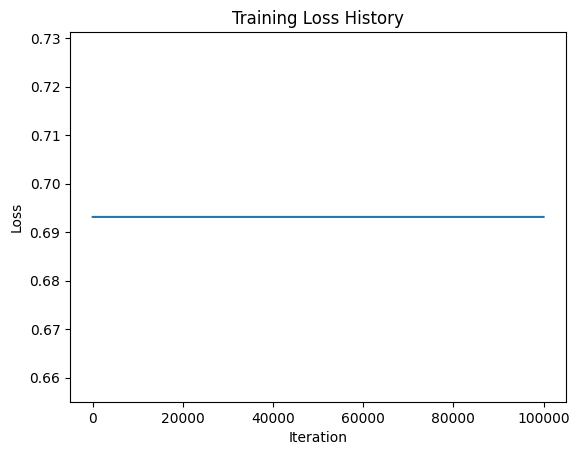

In [88]:
plt.plot(my_lr_model.loss_history)
plt.title('Training Loss History')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

# wrong visual result (its a line, not convex)

## Calculations

<div id="1b1"></div>

#### 1) 

$\frac{d}{d_(qA)}D_KL(P||Q) = -\frac{p_A}{q_A} + \frac{p_B}{1- q_A}$  

In [48]:
# still on paper - todo